In [ ]:
Javier Arturo Rozo Alzate - jarozoa@eafit.edu.co
Johan Steward Rios Naranjo - jriosna1@eafit.edu.co
Liceth Cristina Mosquera Galvis - lcmosquerg@eafit.edu.co
Juan Mauricio Cuscagua Lopez - jcuscagu@eafit.edu.co
Juan Diego Estrada Perez - jestra15@eafit.edu.co

Programa: Aprendizaje Automático Docente: Olga Lucia Quintero - oquinte1@eafit.edu.co
05 de noviembre de 2019

Basado en paper Fuzzy Model Identification Based On Cluster Estimation, Chiu (2004)



# Sustractive clustering Datos Jugete

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA

In [105]:
import numpy as np
import math 
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()

In [25]:
A = iris.data


In [107]:
X = iris.data[:, :2]
y = iris.target

Text(0, 0.5, 'Sepal Width')

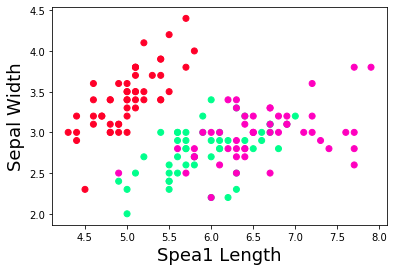

In [108]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

In [109]:
#calcular el valor de alfa

ra = 0.3

alpha = 4/(ra**2)

In [110]:
A[1,:]

array([4.9, 3. , 1.4, 0.2])

In [111]:
# Calculate P_i
#A = np.arange(25).reshape(5,5)

rang = range(A.shape[0])
p=[]
for i in rang:
    r_i=A[i,:]
    l = []
    for j in rang:
        
        r_j=A[j,:]
        l.append(math.exp(-alpha*(np.linalg.norm(r_i-r_j))))    
   
    p.append(sum(l))
              

        
    

In [112]:
p_np = np.asarray(p)
P1_position = p_np.argmax()
P1_potential_value  =p_np[p_np.argmax()]
print("the position of the first centroid is", P1_position)
print("the potential value of the first centroid is", P1_potential_value)

the position of the first centroid is 101
the potential value of the first centroid is 2.000009114540864


In [113]:
#review the potential of each data point x

In [114]:

def redefine(P1_position,P1_potential_value,p_np):
    # define Beta
    global p_np_rev
    rb = 0.7

    #recomended value for rb is 1.5ra

    beta = 4/(rb**2)

    #review the potential of each data point x
    x_1 = A[P1_position,:] #the location of the first selected centroid.
    
    p_np_rev = []
    
    for i in range(len(p_np)):
        r_i=A[i,:]
        p_np_rev.append(p_np[i]- (P1_potential_value*(math.exp(-beta*(np.linalg.norm(r_i-x_1)**2)))))
    
   
   

In [115]:
print(type(p_np_rev))
p_np_rev = np.asarray(p_np_rev)
print(type(p_np_rev))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [116]:
redefine(P1_position,P1_potential_value,p_np)
p_np_rev = np.asarray(p_np_rev)
x_k = p_np_rev.argmax()
p_k =p_np_rev[x_k]


In [117]:
x_k

0

In [118]:
# Define 3 lists, 
#the first is the input of the potential values 
#the second is the list that is modified in the second part of the iteration
#the third save the position of each centroid

l1= p_np
l2= p_np
l3= []

###
#Value e

e= 0.51
###

x_k = P1_position
p_k = P1_potential_value
p_np_rev = p_np

l3.append(P1_position)

# we want to find de second max value of p, to achieve that we replace the current max value for 0


while p_k > e*P1_potential_value:
    
    redefine(x_k,p_k,p_np_rev)
    
    p_np_rev = np.asarray(p_np_rev)
    x_k = p_np_rev.argmax()
    p_k =p_np_rev[x_k]
    
    l3.append(x_k)
    
    

    if (p_k < e*P1_potential_value):
        break
        
    if (len(l3)>10):
        break

        
  
    
    
print("the number of the centroids is", len(l3))
print("the positions of the centroids are", l3)


    

the number of the centroids is 3
the positions of the centroids are [101, 0, 132]
